# Topic Generalization Study and Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

## Overall Successful Rate (Our Best Models vs Other Baselines)

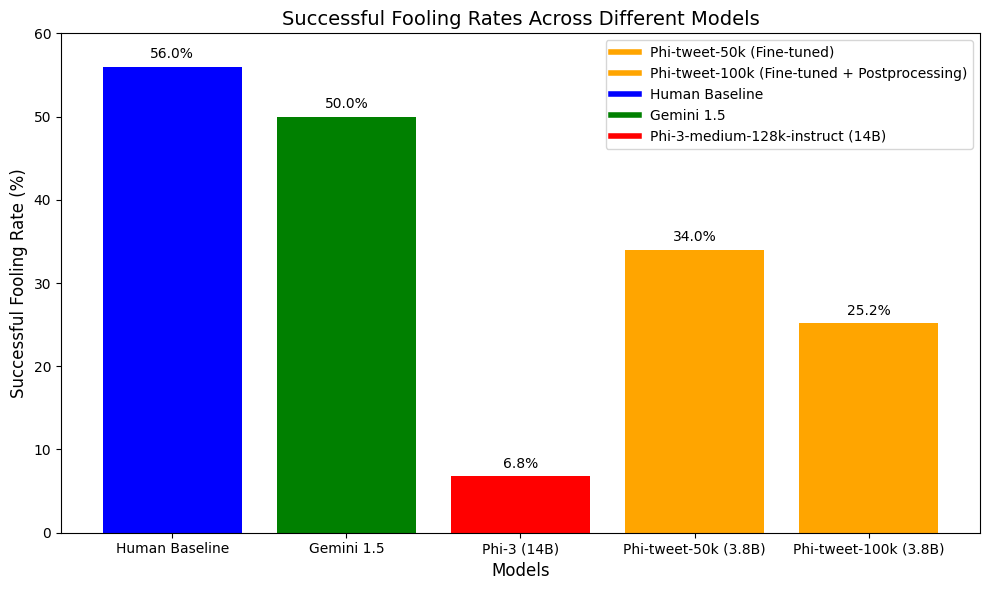

In [ ]:
def plot_fooling_rates_horizontal_labels(data, highlight_models):
    models = [item["model"] for item in data]
    rates = [float(item["rate"].strip('%')) for item in data]
    default_colors = [item["color"] for item in data]

    # Highlight specific models
    bar_colors = [
        "orange" if model in highlight_models else default_colors[i]
        for i, model in enumerate(models)
    ]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(models, rates, color=bar_colors)

    plt.xlabel('Models', fontsize=12)
    plt.ylabel('Successful Fooling Rate (%)', fontsize=12)
    plt.title('Successful Fooling Rates Across Different Models', fontsize=14)
    plt.ylim(0, 60)  # Adjusted to fit the provided rates better
    plt.xticks(fontsize=10, rotation=0)  # Horizontal labels
    plt.yticks(fontsize=10)

    # Annotate each bar with the percentage
    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
                 f'{rates[i]}%', ha='center', fontsize=10)

    # Add legend for highlighted models
    plt.legend(
        handles=[
            plt.Line2D([0], [0], color="orange", lw=4, label="Phi-tweet-50k (Fine-tuned)"),
            plt.Line2D([0], [0], color="orange", lw=4, label="Phi-tweet-100k (Fine-tuned + Postprocessing)"),
            plt.Line2D([0], [0], color="blue", lw=4, label="Human Baseline"),
            plt.Line2D([0], [0], color="green", lw=4, label="Gemini 1.5"),
            plt.Line2D([0], [0], color="red", lw=4, label="Phi-3-medium-128k-instruct (14B)")
        ],
        loc="upper right",
        fontsize=10
    )

    plt.tight_layout()
    plt.show()

# Updated results
horizontal_results = [
    {"model": "Human Baseline", "rate": "56%", "color": "blue"},
    {"model": "Gemini 1.5", "rate": "50%", "color": "green"},
    {"model": "Phi-3 (14B)", "rate": "6.8%", "color": "red"},
    {"model": "Phi-tweet-50k (3.8B)", "rate": "34%", "color": "orange"},
    {"model": "Phi-tweet-100k (3.8B)", "rate": "25.2%", "color": "orange"},
]

# Highlight Phi-tweet models
highlight_horizontal = ["Phi-tweet-50k-Best (3.8B)", "Phi-tweet-100k-Best (3.8B)"]

plot_fooling_rates_horizontal_labels(horizontal_results, highlight_horizontal)



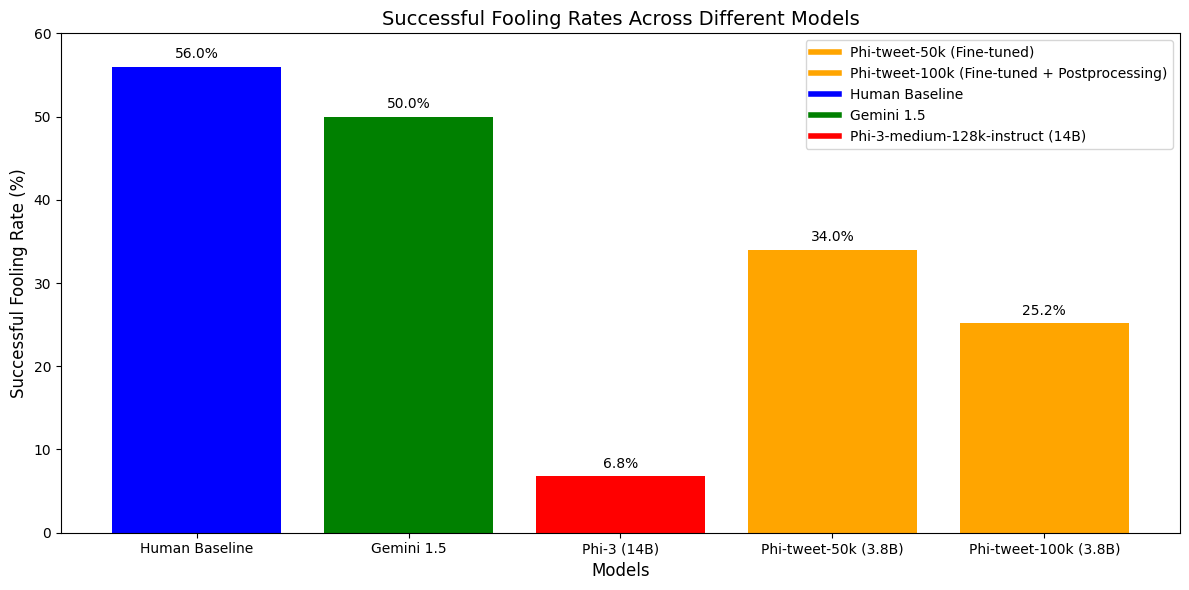

In [ ]:
def plot_fooling_rates_horizontal_labels(data, highlight_models):
    models = [item["model"] for item in data]
    rates = [float(item["rate"].strip('%')) for item in data]
    default_colors = [item["color"] for item in data]

    # Highlight specific models
    bar_colors = [
        "orange" if model in highlight_models else default_colors[i]
        for i, model in enumerate(models)
    ]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(models, rates, color=bar_colors)

    plt.xlabel('Models', fontsize=12)
    plt.ylabel('Successful Fooling Rate (%)', fontsize=12)
    plt.title('Successful Fooling Rates Across Different Models', fontsize=14)
    plt.ylim(0, 60)  # Adjusted to fit the provided rates better
    plt.xticks(fontsize=10, rotation=0)  # Horizontal labels
    plt.yticks(fontsize=10)

    # Annotate each bar with the percentage
    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
                 f'{rates[i]}%', ha='center', fontsize=10)

    # Add legend for highlighted models
    plt.legend(
        handles=[
            plt.Line2D([0], [0], color="orange", lw=4, label="Phi-tweet-50k (Fine-tuned)"),
            plt.Line2D([0], [0], color="orange", lw=4, label="Phi-tweet-100k (Fine-tuned + Postprocessing)"),
            plt.Line2D([0], [0], color="blue", lw=4, label="Human Baseline"),
            plt.Line2D([0], [0], color="green", lw=4, label="Gemini 1.5"),
            plt.Line2D([0], [0], color="red", lw=4, label="Phi-3-medium-128k-instruct (14B)")
        ],
        loc="upper right",
        fontsize=10
    )

    plt.tight_layout()
    plt.show()

# Updated results
horizontal_results = [
    {"model": "Human Baseline", "rate": "56%", "color": "blue"},
    {"model": "Gemini 1.5", "rate": "50%", "color": "green"},
    {"model": "Phi-3 (14B)", "rate": "6.8%", "color": "red"},
    {"model": "Phi-tweet-50k (3.8B)", "rate": "34%", "color": "orange"},
    {"model": "Phi-tweet-100k (3.8B)", "rate": "25.2%", "color": "orange"},
]

# Highlight Phi-tweet models
highlight_horizontal = ["Phi-tweet-50k-Best (3.8B)", "Phi-tweet-100k-Best (3.8B)"]

plot_fooling_rates_horizontal_labels(horizontal_results, highlight_horizontal)



## Successful Rate Based on Different Tweets Topic

In [ ]:
import textwrap

def plot_success_rate_for_category(csv_files_with_model_names, category_to_plot):
    categories = [
        "News and Current Events",
        "Pop Culture and Entertainment",
        "Personal and Lifestyle",
        "Opinion-Based and Controversial Topics",
        "Technology and Industry Trends",
    ]
    num_rows_per_category = 50

    # Validate the category input
    if category_to_plot not in categories:
        raise ValueError(f"Invalid category. Choose from: {', '.join(categories)}")

    # Initialize a dictionary to hold success rates and colors for the given category
    model_success_rates = {}
    model_colors = {}

    # Process each CSV file
    for model_dict in csv_files_with_model_names:
        file_path = model_dict['file']
        model_name = model_dict['model']
        color = model_dict.get('color', 'skyblue')  # Default to skyblue if no color provided
        df = pd.read_csv(file_path)

        # Get data for the specified category
        category_index = categories.index(category_to_plot)
        start_idx = category_index * num_rows_per_category
        end_idx = start_idx + num_rows_per_category
        category_data = df.iloc[start_idx:end_idx]
        successful_count = category_data['label'].str.lower().eq('no').sum()
        success_rate = successful_count / num_rows_per_category * 100  # Calculate success rate
        model_success_rates[model_name] = success_rate
        model_colors[model_name] = color

    # Wrap long labels for better readability
    wrapped_model_names = [
        "\n".join(textwrap.wrap(model, width=8)) for model in model_success_rates.keys()
    ]

    # Print metrics for the category
    print(f"Success Rates for {category_to_plot}:")
    for model_name, rate in model_success_rates.items():
        print(f"  {model_name}: {rate:.2f}%")

    # Plot success rates for the specified category with vertical bars and horizontal x-axis labels
    plt.figure(figsize=(12, 8))
    model_names = list(model_success_rates.keys())
    success_rates = list(model_success_rates.values())
    bar_colors = [model_colors[model] for model in model_names]

    plt.bar(wrapped_model_names, success_rates, color=bar_colors)
    plt.title(f'Success Rates for {category_to_plot}', fontsize=14)
    plt.xlabel('Models', fontsize=14, labelpad=10)
    plt.ylabel('Success Rate (%)', fontsize=14, labelpad=10)
    plt.xticks(rotation=0, ha='center', fontsize=10)  # Horizontal labels
    plt.ylim(0, 100)

    # Add legend for color categories
    legend_elements = [
        plt.Line2D([0], [0], color='blue', lw=4, label='Baseline'),
        plt.Line2D([0], [0], color='red', lw=4, label='Phi-Tweet-100k'),
        plt.Line2D([0], [0], color='orange', lw=4, label='Phi-Tweet-50k'),
    ]
    plt.legend(handles=legend_elements, title="Categories", loc='upper right', fontsize=10)

    plt.tight_layout()
    plt.show()


In [ ]:
csv_files = [
    {'file': '../eval/human_tweets_baseline.csv', 'model': 'Human Tweets', 'color': 'blue'},
    {'file': '../eval/gemini_baseline.csv', 'model': 'Gemini 1.5', 'color': 'blue'},
    {'file': '../eval/14B_3shots_real.csv', 'model': 'Phi-3.5 (14B)', 'color': 'blue'},

    {'file': '../eval/50k_3shots_real.csv', 'model': '50k', 'color': 'red'},
    {'file': '../eval/50k_3shots_rag_real.csv', 'model': '50k+RAG', 'color': 'red'},
    {'file': '../eval/50k_3shots_rag_post_real.csv', 'model': '50k+RAG+PP', 'color': 'red'},
    {'file': '../eval/50k_3_shots_post_real.csv', 'model': '50k+PP', 'color': 'red'},

    {'file': '../eval/100k_3shots_real.csv', 'model': '100k', 'color': 'orange'},
    {'file': '../eval/100k_3shots_rag_real.csv', 'model': '100k+RAG', 'color': 'orange'},
    {'file': '../eval/100k_3shots_rag_post_real.csv', 'model': '100k+RAG+PP', 'color': 'orange'},
    {'file': '../eval/100k_3_shots_post_real.csv', 'model': '100k+PP', 'color': 'orange'},
]

### News and Current Events

Success Rates for News and Current Events:
  Human Tweets: 34.00%
  Gemini 1.5: 32.00%
  Phi-3.5 (14B): 12.00%
  50k: 24.00%
  50k+RAG: 28.00%
  50k+RAG+PP: 16.00%
  50k+PP: 18.00%
  100k: 22.00%
  100k+RAG: 34.00%
  100k+RAG+PP: 14.00%
  100k+PP: 26.00%


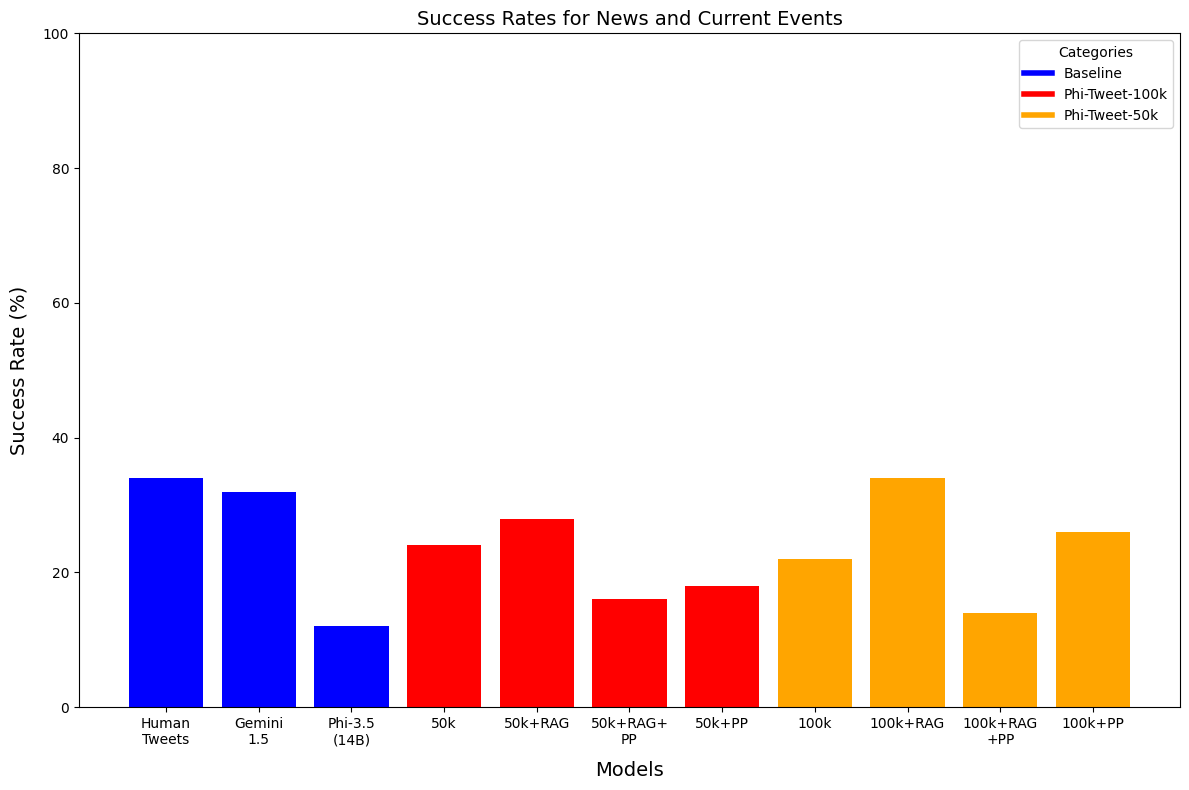

In [ ]:
plot_success_rate_for_category(csv_files, "News and Current Events")

### Pop Culture and Entertainment

Success Rates for Pop Culture and Entertainment:
  Human Tweets: 82.00%
  Gemini 1.5: 72.00%
  Phi-3.5 (14B): 8.00%
  50k: 22.00%
  50k+RAG: 18.00%
  50k+RAG+PP: 18.00%
  50k+PP: 22.00%
  100k: 30.00%
  100k+RAG: 30.00%
  100k+RAG+PP: 34.00%
  100k+PP: 46.00%


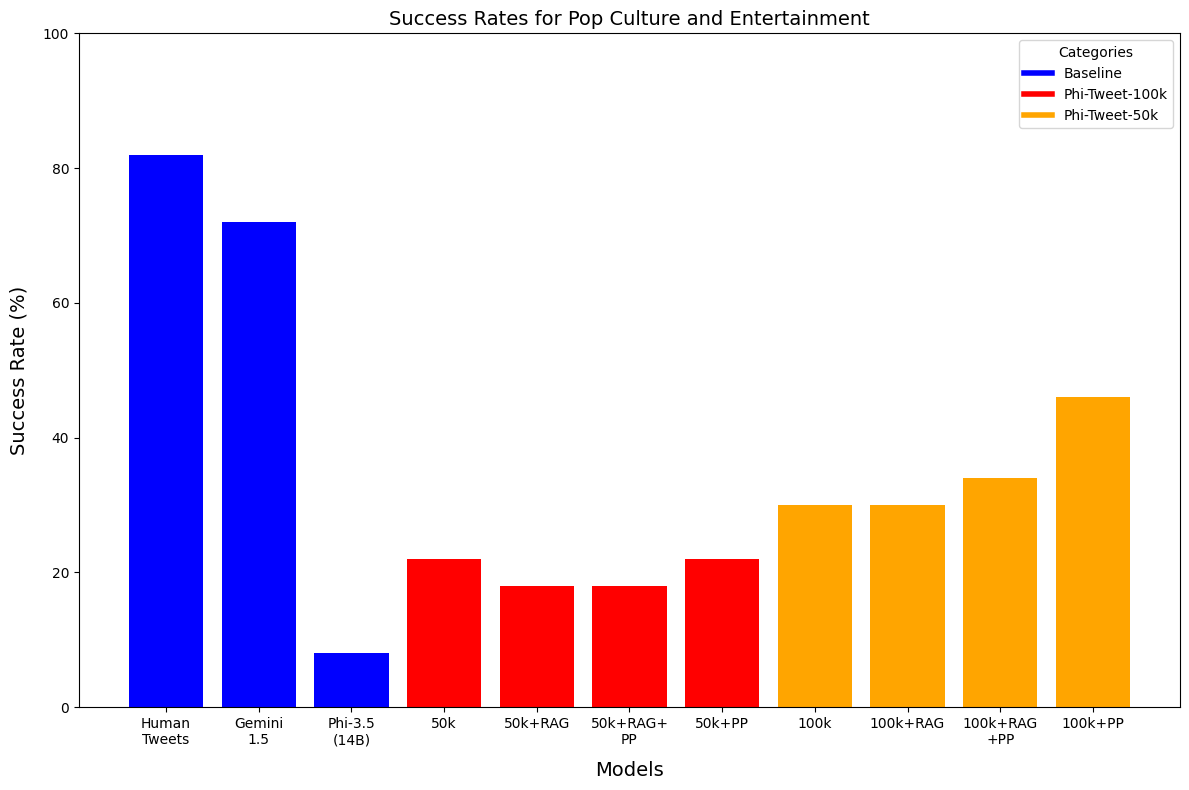

In [ ]:
plot_success_rate_for_category(csv_files, "Pop Culture and Entertainment")

### Personal and Lifestyle

Success Rates for Personal and Lifestyle:
  Human Tweets: 64.00%
  Gemini 1.5: 74.00%
  Phi-3.5 (14B): 2.00%
  50k: 44.00%
  50k+RAG: 24.00%
  50k+RAG+PP: 22.00%
  50k+PP: 32.00%
  100k: 46.00%
  100k+RAG: 30.00%
  100k+RAG+PP: 52.00%
  100k+PP: 36.00%


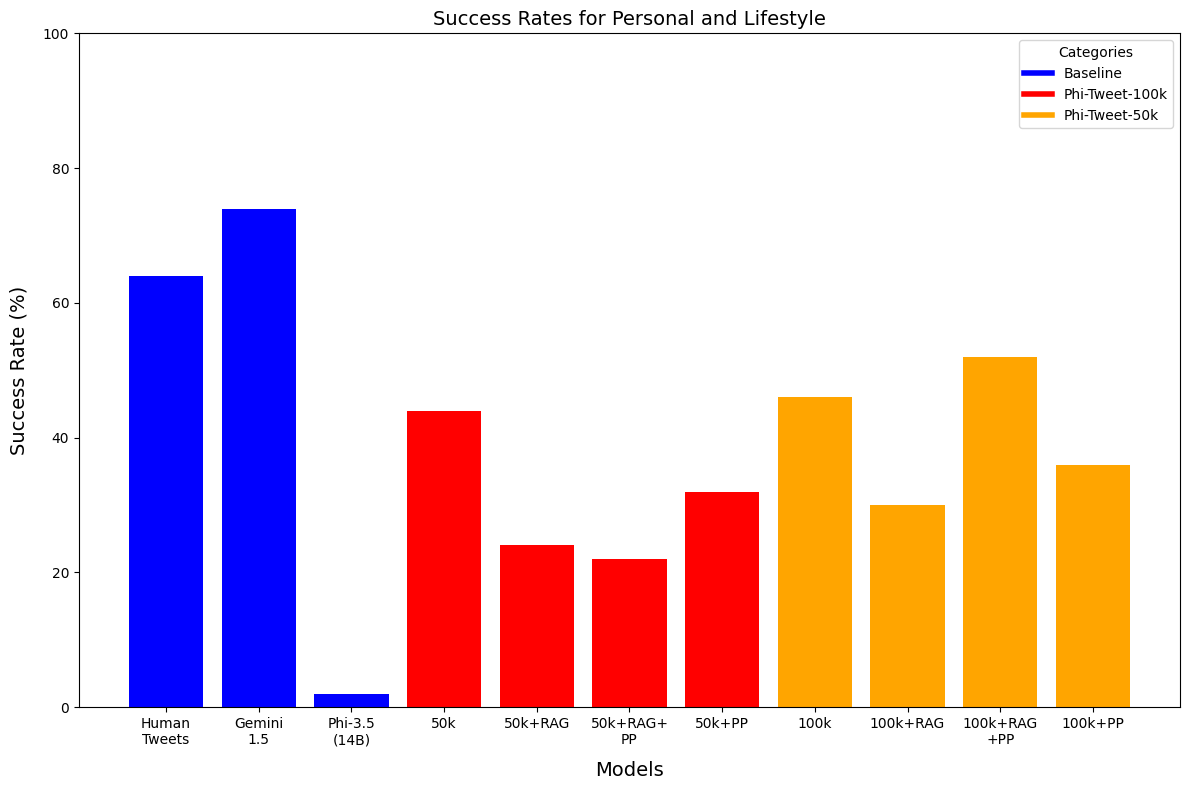

In [ ]:
plot_success_rate_for_category(csv_files, "Personal and Lifestyle")

### Opinion-Based and Controversial Topics

Success Rates for Opinion-Based and Controversial Topics:
  Human Tweets: 54.00%
  Gemini 1.5: 32.00%
  Phi-3.5 (14B): 6.00%
  50k: 20.00%
  50k+RAG: 8.00%
  50k+RAG+PP: 10.00%
  50k+PP: 30.00%
  100k: 20.00%
  100k+RAG: 12.00%
  100k+RAG+PP: 20.00%
  100k+PP: 20.00%


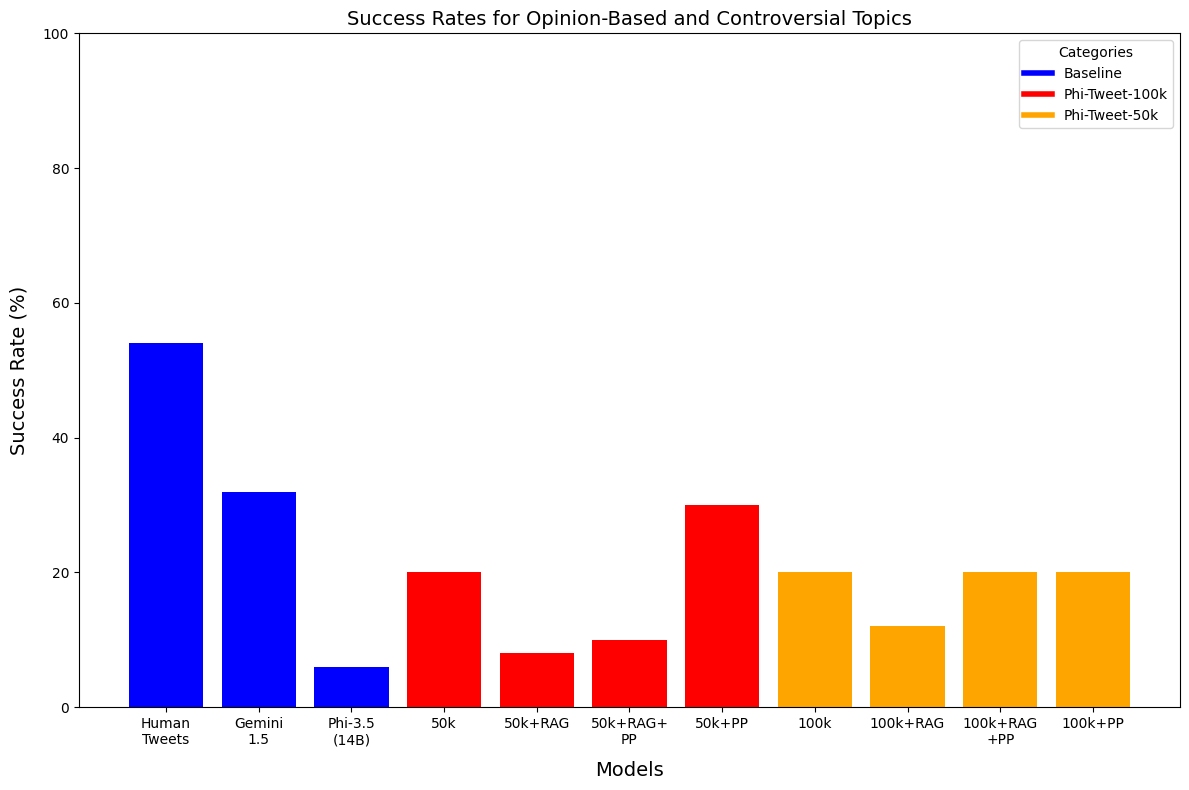

In [ ]:
plot_success_rate_for_category(csv_files, "Opinion-Based and Controversial Topics")

### Technology and Industry Trends

Success Rates for Technology and Industry Trends:
  Human Tweets: 50.00%
  Gemini 1.5: 44.00%
  Phi-3.5 (14B): 6.00%
  50k: 16.00%
  50k+RAG: 2.00%
  50k+RAG+PP: 18.00%
  50k+PP: 20.00%
  100k: 28.00%
  100k+RAG: 14.00%
  100k+RAG+PP: 34.00%
  100k+PP: 42.00%


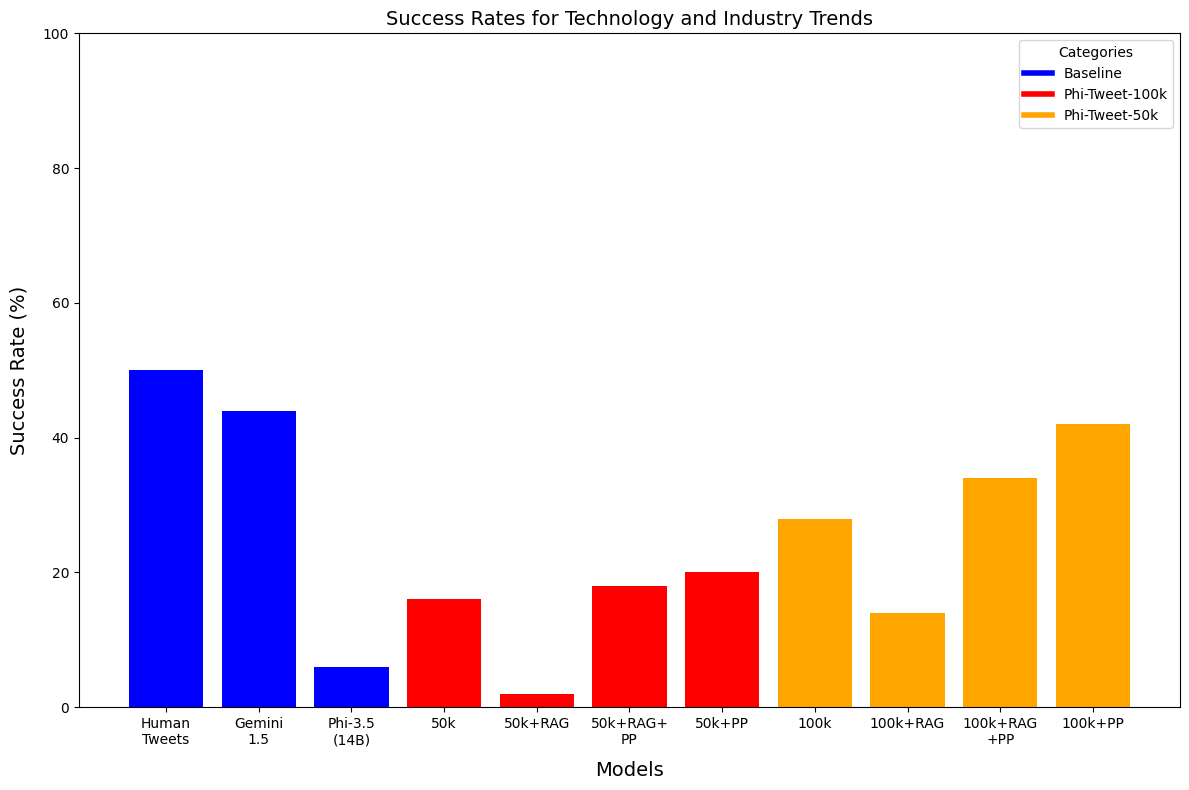

In [ ]:
plot_success_rate_for_category(csv_files, "Technology and Industry Trends")

### Others:

In [ ]:
def plot_success_rate_from_dict_list(csv_files_with_model_names):
    categories = [
        "News and Current Events",
        "Pop Culture and Entertainment",
        "Personal and Lifestyle",
        "Opinion-Based and Controversial Topics",
        "Technology and Industry Trends",
    ]
    num_rows_per_category = 50

    # Initialize a dictionary to hold success rates for each model
    model_success_rates = {model_dict['model']: {category: 0 for category in categories} for model_dict in csv_files_with_model_names}

    # Process each CSV file
    for model_dict in csv_files_with_model_names:
        file_path = model_dict['file']
        model_name = model_dict['model']
        df = pd.read_csv(file_path)

        for i, category in enumerate(categories):
            start_idx = i * num_rows_per_category
            end_idx = start_idx + num_rows_per_category
            category_data = df.iloc[start_idx:end_idx]
            successful_count = category_data['label'].str.lower().eq('no').sum()
            model_success_rates[model_name][category] = successful_count / num_rows_per_category * 100  # Calculate success rate

    # Print metrics
    print("Success Rates by Model and Category:")
    for model_name, success_rate in model_success_rates.items():
        print(f"\nModel: {model_name}")
        for category, rate in success_rate.items():
            print(f"  {category}: {rate:.2f}%")

    # Plot the results
    bar_width = 0.1
    x_indices = range(len(categories))
    plt.figure(figsize=(14, 8))

    for i, (model_name, success_rate) in enumerate(model_success_rates.items()):
        bar_positions = [x + i * bar_width for x in x_indices]
        plt.bar(bar_positions, success_rate.values(), bar_width, label=model_name)

    plt.title('Fooling Rate Comparison of Different Bots', fontsize=16)
    plt.xlabel('Categories', fontsize=12)
    plt.ylabel('Success Rate (%)', fontsize=12)
    plt.xticks([x + bar_width * (len(model_success_rates) - 1) / 2 for x in x_indices], categories, rotation=45, ha='right')
    plt.legend(title="Models")
    plt.tight_layout()
    plt.show()


In [ ]:
csv_files = [
    {'file': 'eval/human_tweets_baseline.csv', 'model': 'Human Baseline'},
    {'file': 'eval/14B_3shots_real.csv', 'model': 'Phi-3.5-14B'},
    {'file': 'eval/100k_3shots_real.csv', 'model': 'Phi-3.5-tweet-100k'},
    {'file': 'eval/50k_3shots_real.csv', 'model': 'Phi-3.5-tweet-50k'},
    {'file': 'eval/50k_3shots_rag_real.csv', 'model': 'Phi-3.5-tweet-50k-rag'},
    {'file': 'eval/50k_3_shots_post_real_alan.csv', 'model': 'Phi-3.5-tweet-50k-post'},
    {'file': 'eval/50k_3shots_rag_post_real.csv', 'model': 'Phi-3.5-tweet-50k-rag-post'},
    {'file': 'eval/gemini_baseline.csv', 'model': 'Gemini 1.5'},
]

plot_success_rate_from_dict_list(csv_files)

FileNotFoundError: [Errno 2] No such file or directory: 'eval/human_tweets_baseline.csv'